<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/Patientss%20Management%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1902288fc1a531b52bcfa8633fb6953bf6ec386b388daa7921242c3cd68e20d7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


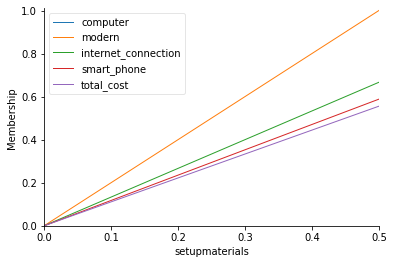

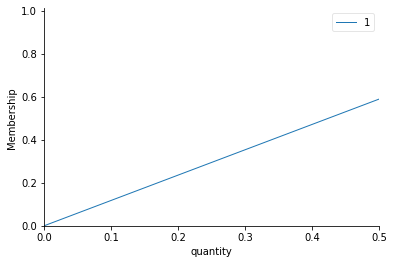

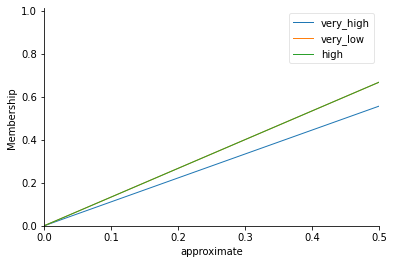

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setupmaterials = ctrl.Antecedent(np.arange(0,1,0.5), 'setupmaterials')
quantity = ctrl.Antecedent(np.arange(0,1,0.5), 'quantity')
approximate = ctrl.Consequent(np.arange(0,1,0.5), 'approximate')

setupmaterials['computer'] = fuzz.trimf(setupmaterials.universe,[0, 0.25, 0.5])
setupmaterials['modern'] = fuzz.trimf(setupmaterials.universe,[0, 0.5, 0.75])
setupmaterials['internet_connection'] = fuzz.trimf(setupmaterials.universe,[0, 0.75, 0.9])
setupmaterials['smart_phone'] = fuzz.trimf(setupmaterials.universe,[0, 0.85, 1])
setupmaterials['total_cost'] = fuzz.trimf(setupmaterials.universe,[0, 0.9, 1])

quantity['1'] = fuzz.trimf(quantity.universe,[0, 0.25, 0.5])
quantity['1'] = fuzz.trimf(quantity.universe,[0, 0.5, 0.75])
quantity['1'] = fuzz.trimf(quantity.universe,[0, 0.75, 0.9])
quantity['1'] = fuzz.trimf(quantity.universe,[0, 0.85, 1])

approximate['very_high'] = fuzz.trimf(approximate.universe,[0, 0.25, 0.5])
approximate['very_low'] = fuzz.trimf(approximate.universe,[0, 0.5, 0.75])
approximate['very_low'] = fuzz.trimf(approximate.universe,[0, 0.75, 0.9])
approximate['high'] = fuzz.trimf(approximate.universe,[0, 0.75, 0.9])
approximate['very_high'] = fuzz.trimf(approximate.universe,[0, 0.9, 1])

setupmaterials.view()
quantity.view()
approximate.view() 














0.33126934984520123


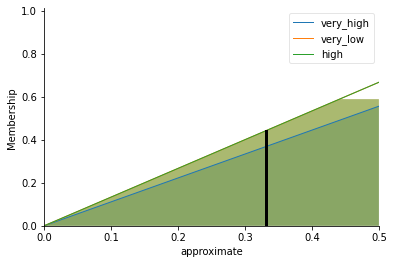

In [8]:
rule1 = ctrl.Rule(setupmaterials['computer'] & quantity['1'], approximate['very_high'])
rule2 = ctrl.Rule(setupmaterials['modern'] & quantity['1'],approximate['very_low'])
rule3 = ctrl.Rule(setupmaterials['internet_connection'] & quantity['1'], approximate['very_low'])
rule4 = ctrl.Rule(setupmaterials['smart_phone'] & quantity['1'], approximate['high'])
rule5 = ctrl.Rule(setupmaterials['total_cost'] & quantity['1'], approximate['very_high'])

approximating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
approximating = ctrl.ControlSystemSimulation(approximating_ctrl)

approximating.input['setupmaterials'] = 0.5
approximating.input['quantity'] = 1

approximating.compute()
print(approximating.output['approximate']) 
approximate.view(sim = approximating)



